In [18]:
import json
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import networkx as nx
import matplotlib.pyplot as plt

In [2]:

con = sqlite3.connect('../data/interim/articles_with_author_mapping.db')
cur = con.cursor()


In [41]:
cur.execute("select name, abbreviation from authors limit 100")
rows = cur.fetchall()
authors = pd.DataFrame(columns=["name", "abbreviation"], data=rows)

In [63]:
# remove duplicates
authors = authors.drop_duplicates()
authors

,name,abbreviation
0,kai-uwe brandt,kub
1,jan peter,jap
2,manfred lüttich,maf
3,heiko trebs,ht
4,andreas tappert,art
6,annett riedel,ar
7,andreas tappert,ast
9,nadja topfstedt,nt
14,thomas lang,tha
16,antje henselin-rudolph,ahr


In [69]:
# remove self referencing nodes
authors = authors[authors["name"] != authors["abbreviation"]]

In [70]:
# add name and abbreviation as nodes list and remove duplicates
nodes = list(authors["name"].unique()) + list(authors["abbreviation"].unique())

# add unique edges based on entries in the authors table
edges = []
for index, row in authors.iterrows():
    edges.append((row["name"], row["abbreviation"]))

In [71]:
G = nx.Graph()
G.add_nodes_from(list(authors["name"].unique()), bipartite=0)
G.add_nodes_from(list(authors["abbreviation"].unique()), bipartite=1)
G.add_edges_from(edges)

In [72]:
print(f"number of nodes: {G.number_of_nodes()}, number of edges: {G.number_of_edges()}")

number of nodes: 53, number of edges: 29


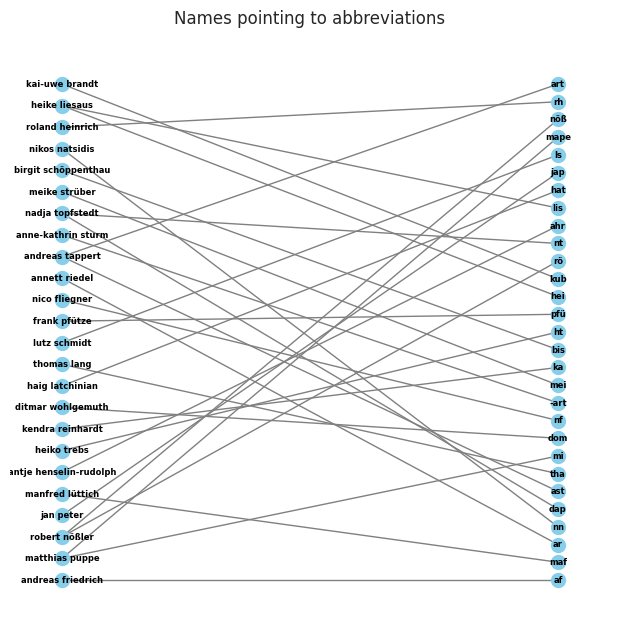

In [93]:
# Draw the graph
pos = nx.bipartite_layout(G, list(authors["name"].unique()))
plt.figure(figsize=[6, 6])
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=6, font_weight='bold', edge_color='gray')
plt.title('Names pointing to abbreviations')
plt.savefig('../reports/figures/names_to_abbreviations.png', dpi=300)